# Lab 07: Time series analysis 2

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assitant Professor Vrije Universiteit Amsterdam<br>
Statistics and Data Analysis Course


## Learning goals:

* Apply and improve your knowledge of Python and Jupyter
* Learn to apply Fourier analysis to extract dominant frequencies from time series and interpret them
* Learn to fit frequency distributions to time series data and interpret the results to quantify the chances of extreme events to occur
* Develop a feeling for how statistical tools can help you, but you still require *your interpretation* to draw conclusions.

## Introduction
In this lab, we will continue to experiment with **time series analysis**. Last lab, we have focused on the occurrence of periodic events and changes. This time, we will take our data analysis one step further by looking at the frequency and probability of events that do not occur at a regular interval. We call these events **extreme events** and they play an important role in society.

**Exercise 1:** You know the drill by now: Let's load some packages! For this lab, we need the familiar `numpy` and `matplotlib.pyplot` packages as well as the `signal` package from `scipy` (see **Lab06**), the `loadmat` package from `scipy.io` (see **Lab05**) and the `pandas` package (see **Lab02**). Load them using the code box below.

In [1]:
# Make sure our figures show up in Jupyter
%matplotlib inline
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import signal as signal

**Exercise 2:** Now use the `loadmat` function to load the data file `lab07.mat` (Tip: you've done this before in **Lab05**)

In [5]:
data = loadmat('lab07.mat')

The loadmat function returns a dictionary with variables stored as keys. We can output all keys, and then access the data of each variable using the key:

In [7]:
data.keys() # Have a look at the keys of the library

dict_keys(['__header__', '__version__', '__globals__', 'X', 'annualmean', 'data', 't'])

In [9]:
X = data['X'] # Extract the data belonging to key `X`
print(X)

[[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
  14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
  28.5 29.5 30.5 31.5 32.5 33.5 34.5]]


In this dataset, the key `t` indicates the time vector and the key `data` contains the values of our dependent variable. Together they make up our time series. We can parse the time and data vectors in 1 matrix to make it easier to work with them. Study the code below to understand what it does and then inspect the end result using a `print()` statement.

In [11]:
df = pd.DataFrame(np.concatenate((data['t'], data['data']), axis=1), columns=['t', 'data'])

In [13]:
print(df)

           t     data
0        1.0   6.8900
1        2.0   8.3460
2        3.0  12.1745
3        4.0  13.9490
4        5.0  14.7160
...      ...      ...
4379  4380.0  12.2880
4380  4381.0  11.8392
4381  4382.0   9.8127
4382  4383.0   7.7511
4383  4384.0   6.9144

[4384 rows x 2 columns]


The **lab07** file contains data on daily drainage of the Dinkel river in Twente (in $m^3/s$). The data covers 12 years, from 1988 until 1999. The variable `data` contains the drainage values. The variable `t` contains the day number since January 1, 1988. The variable `X` will be used later in the exercise.

**Exercise 3:** Explore the data by making a time series plot.

Text(0, 0.5, 'drainage (m3/s)')

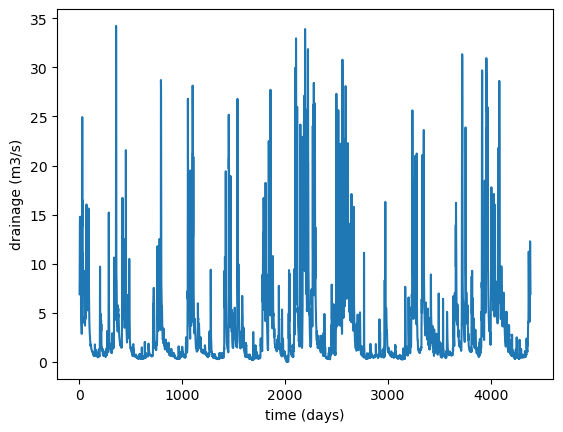

In [15]:
# Plot time series
plt.figure(1) # Create plot
plt.plot(df['t'], df['data']) # Plot the drainage data variable against variable t
plt.xlabel('time (days)') # Label x axis
plt.ylabel('drainage (m3/s)') # Label y axis

**Exercise 4:** We are going to do the frequency analysis of the Dinkel river discharge. Let's use the function `signal.periodogram` that we used in **Lab07** for this. Use the code box below to do this frequency analysis.

In [23]:
f1, Pxx1 = signal.periodogram(df.data, window = "cosine", nfft = 5000, fs = 1)

You were probably playing around with the parameters of the `signal.periodogram` function quite a lot to get the function to work. Luckily, we can make our life easier by leaving all those parameters empty. The function then just picks default values for `window`, `fs` and `nfft`:

In [19]:
f, Pxx = signal.periodogram(df.data)

Make sure that you understand the output of the signal.periodogram function well. If necessary, have a look at **Lab06** or the help function.

**Exercise 5:** Plot the output as a periodogram:

Text(0, 0.5, 'Variance')

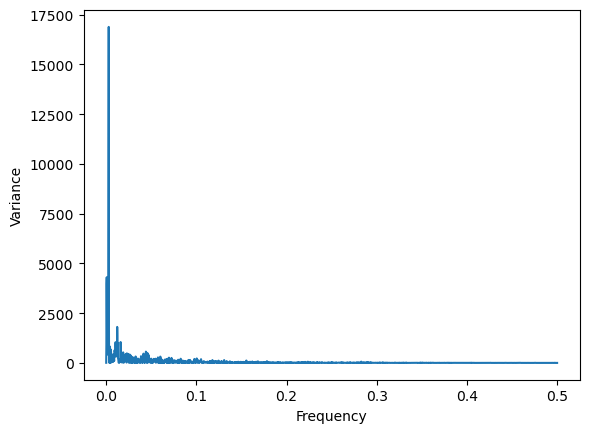

In [25]:
plt.figure()
plt.plot(f1, Pxx1)
plt.xlabel('Frequency')
plt.ylabel('Variance')

**Exercise 6:** Now zoom in a bit on the left side of the graph. You can do this either by only plotting the first 100 values of the input `f` and `Pxx` in the `plt.plot` statement (e.g. `f[1:100]`) or by changing the x-axis limits (see **Lab06**):

Text(0, 0.5, 'Variance')

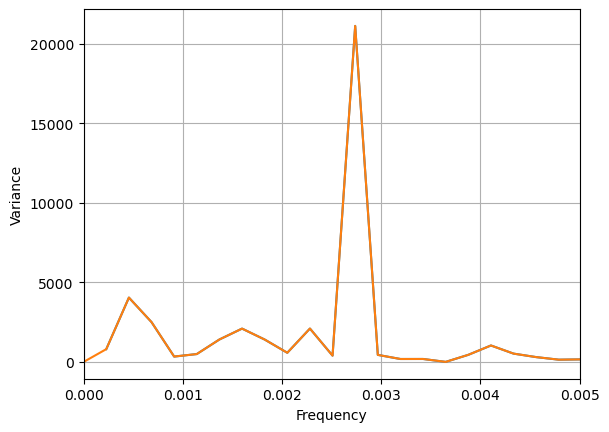

In [11]:
# Restrict input
plt.figure(1)
plt.plot(f[1:100],Pxx[1:100])
plt.xlabel('Frequency')
plt.ylabel('Variance')

# Trim x-axis
plt.figure(1)
plt.plot(f, Pxx)
plt.xlim((0, 0.005))
plt.grid()
plt.xlabel('Frequency')
plt.ylabel('Variance')

**Question 1:** For which frequency does the variance peak? What is the corresponding wavelength and what does this represent?

**Answer 1:** It peaks around a frequency of 0.0027 $days^{-1}$, which corresponds to a period of roughly 370 days, representing the annual (yearly) cycle.

The variable `X` contains middle values of different classes to construct a histogram of daily discharges. The values in `X` range between 0.5 and 34.5. Classes are spaced with intervals of 1 $m^3/s$. We will use the `matplotlib` function `hist` to plot a *histogram*. First, we have to calculate the bins (interval breaks) from `X`:

In [12]:
bins = np.unique(np.concatenate((X - 0.5, X + 0.5)))

Now we plot the histogram:

Text(0, 0.5, 'Number of days')

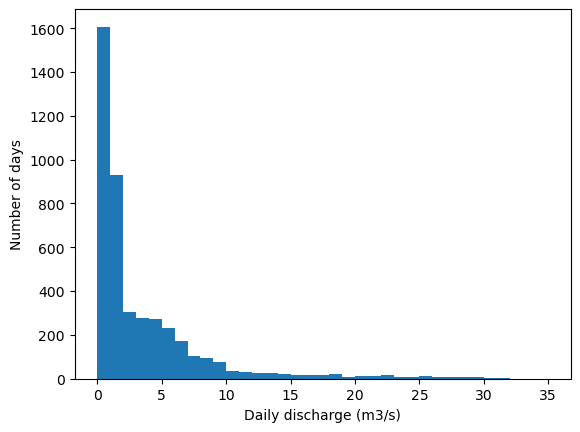

In [13]:
plt.figure()
plt.hist(df.data, bins = bins)
plt.xlabel('Daily discharge (m3/s)')
plt.ylabel('Number of days')

**Question 2:** What do you think about the number of low and and high discharge days? Is the pattern in the histogram as you expected?

**Answer 2:** There is no continuous distribution of low to high discharge days. There are a high number of low discharge days and a very low number of high discharge days. The distribution is not linear.

Now, we will calculate frequencies of probability dividing the histogram by the total number of days. We first use the function `histogram` (`numpy`) to calculate the histogram statistics, and then divided it by the total number of days:

In [14]:
hist_data = np.histogram(df.data, bins = bins)
N = hist_data[0] / float(len(df.data))

**Exercise 7:** Use a graph to check your result from the calculations above. You can use the plotting techniques (e.g. `plt.plot`) to do this, but you have to transform your `X` values to the right format. You can do so by using the `np.concatenate` function you used in the calculation of the `bins` vector above.

Text(0, 0.5, 'Fraction of days')

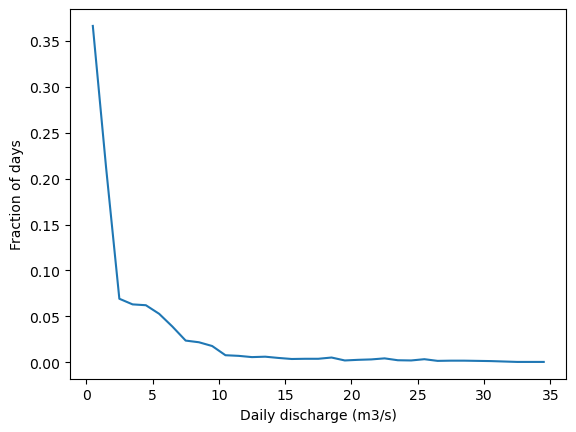

In [15]:
# Plot frequency distribution in line graph
plt.figure(1)
plt.plot(np.concatenate(X), N)
plt.xlabel('Daily discharge (m3/s)')
plt.ylabel('Fraction of days')

We will fit the *Gumbel distribution* to our data. The Gumbel function is often used for flood analysis because its shape allows for outliers in the data. The Gumbel distribution is defined by the parameters *alfa* and *mu*, which determine the shape of the distribution. *Mu* determines for which values the distribution peaks, while *alfa* determines the amplitude of the peak. *Mu* and *alfa* can be calculated from the mean and standard deviation of the data:

In [16]:
alfa = 0.7797 * np.std(df.data)
mu = np.mean(df.data) - 0.5772 * alfa

Study the code above to make sure you understand what is going on. In the process, you have learned a useful function for calculating the *mean* and *standard deviation* of a dataset automatically in Python!

Next, we can use the Gumbel function to calculate the theoretical probabilities of different discharges. To do this, we will compute the cumulative probabilities for different discharges for the boundaries of the bins and then subtract those from each other to get the probabilities for discharges within the bins. We will start by calculating cumulative probabilities twice, in which the second array represent the same bin boundaries but with 1 added:

In [17]:
bins2 = bins + 1

The cumulative probabilities now follow after:

In [18]:
p1 = np.exp(-np.exp(-(bins - mu) / alfa))
p2 = np.exp(-np.exp(-(bins2 - mu) / alfa))

Now we can calculate the modelled probability per bin:

In [19]:
p = p2 - p1

Let's now plot the histogram of our data and the Gumbel distribution fit to our data in one graph:

Text(0, 0.5, 'Frequency/Probability')

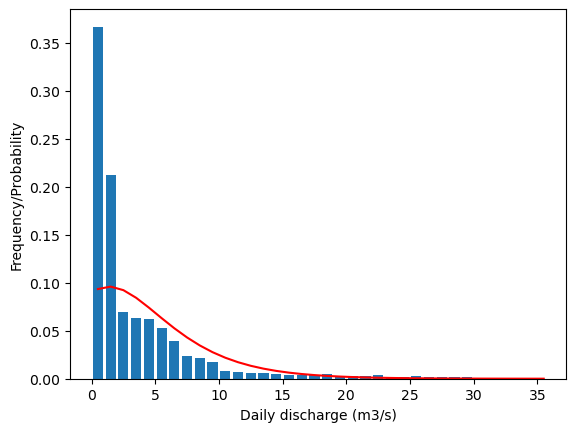

In [20]:
plt.figure()
plt.bar(np.arange(0.5, 35.5, 1), N) # Plot the histogram
plt.plot(np.arange(0.5, 36.5, 1), p, color = 'r') # Plot the modelled Gumbel distribution
plt.xlabel('Daily discharge (m3/s)')
plt.ylabel('Frequency/Probability')

**Question 3:** What do you think about the fit of our Gumbel distribution model to the data?

**Answer 3:** The model captures the overall shape, but does not work very well for very low and very high discharges.

Let’s calculate the *recurrence time* of a discharge larger than 25 $m^3$ based on the Gumbel distribution. We will therefore first calculate what the probability of a discharge lower than 25 $m^3$ is:

In [21]:
p_lowerthan25 = np.exp(-np.exp(-(25 - mu) / alfa))

**Exercise 8:** Sicne we know that probabilities always have a total sum of 1 (or 100% chance), you can easily figure out what the probability of a discharge higher than 25 (`p_higherthan25`) then must be. Calculate it in the box below:

In [22]:
p_higherthan25 = 1- p_lowerthan25

**Exercise 9:** Knowing that the *recurrence time* of an event is the inverse of its probability, calculate the recurrence time of a discharge higher than 25 $m^3/s$ (`T_higherthan25`) in the box below and inspect the result.

In [23]:
T_higherthan25 = 1 / p_higherthan25
print(T_higherthan25)

486.65551334319497


To check whether our model (the Gumbel distribution) of the frequency of flood events in the Dinkel river gives us a good prediction of the recurrence interval, we can compare this result with the observed frequency of discharges larger than 25 $m^3/s$ by counting the number of values larger than 25 $m^3/s$ in the data. Use the len and np.where functions to do this:

In [24]:
Dischargeover25 = np.size(np.where(df.data > 25)) # Count the number of occurrences with a discharge over 25 m3/s in the data
p_Dischargeover25 = Dischargeover25 / float(len(df.data)) # Divide by the total number of days in the dataset to obtain the probability

**Exercise 10:** From this probability, now calculate the *observed* recurrence time (`T_higherthan25_obs`) in the same way as you calculated `T_higherthan25` in **Exercise 9** and inspect the result.

In [25]:
T_higherthan25_obs = 1 / p_Dischargeover25
print(T_higherthan25_obs)

85.9607843137255


**Question 4:** Now compare the recurrence time of discharge larger than 25 $m^3$ estimated from the Gumbel distribution (`T_higherthan25`) with the observed recurrence time (`T_higherthan25_obs`). How do they compare and why do you think this is the case?

**Answer 5:** The observed recurrence time (86 days) is much lower than the one estimated by the Gumbel function (487 days), which means that the observed frequency of >25 m3/s discharge days is higher than that predicted by the Gumbel distribution. So we observe many more extreme drainage events than you would estimate from the Gumbel distribution. The Gumbel distribution clearly underfits for high drainage values.

**Question 5:** It turns out that low frequency events (with a high recurrence interval) are almost always harder to predict than events that occur more frequenty. Why do you think this is the case? Can you think of a solution to make a better model for the discharge of the Dinkel river and for these type of event in general? What is the most important thing we can do to better understand these distributions?

**Answer 5:** The problem is the lack of data for these rare events in our time series. The best solution for this is to work with longer time series to obtain a more realistic sampling of the events with high recurrence intervals.